In [2]:
import pandas as pd

# Bankruptcy Prediction Toy Example 
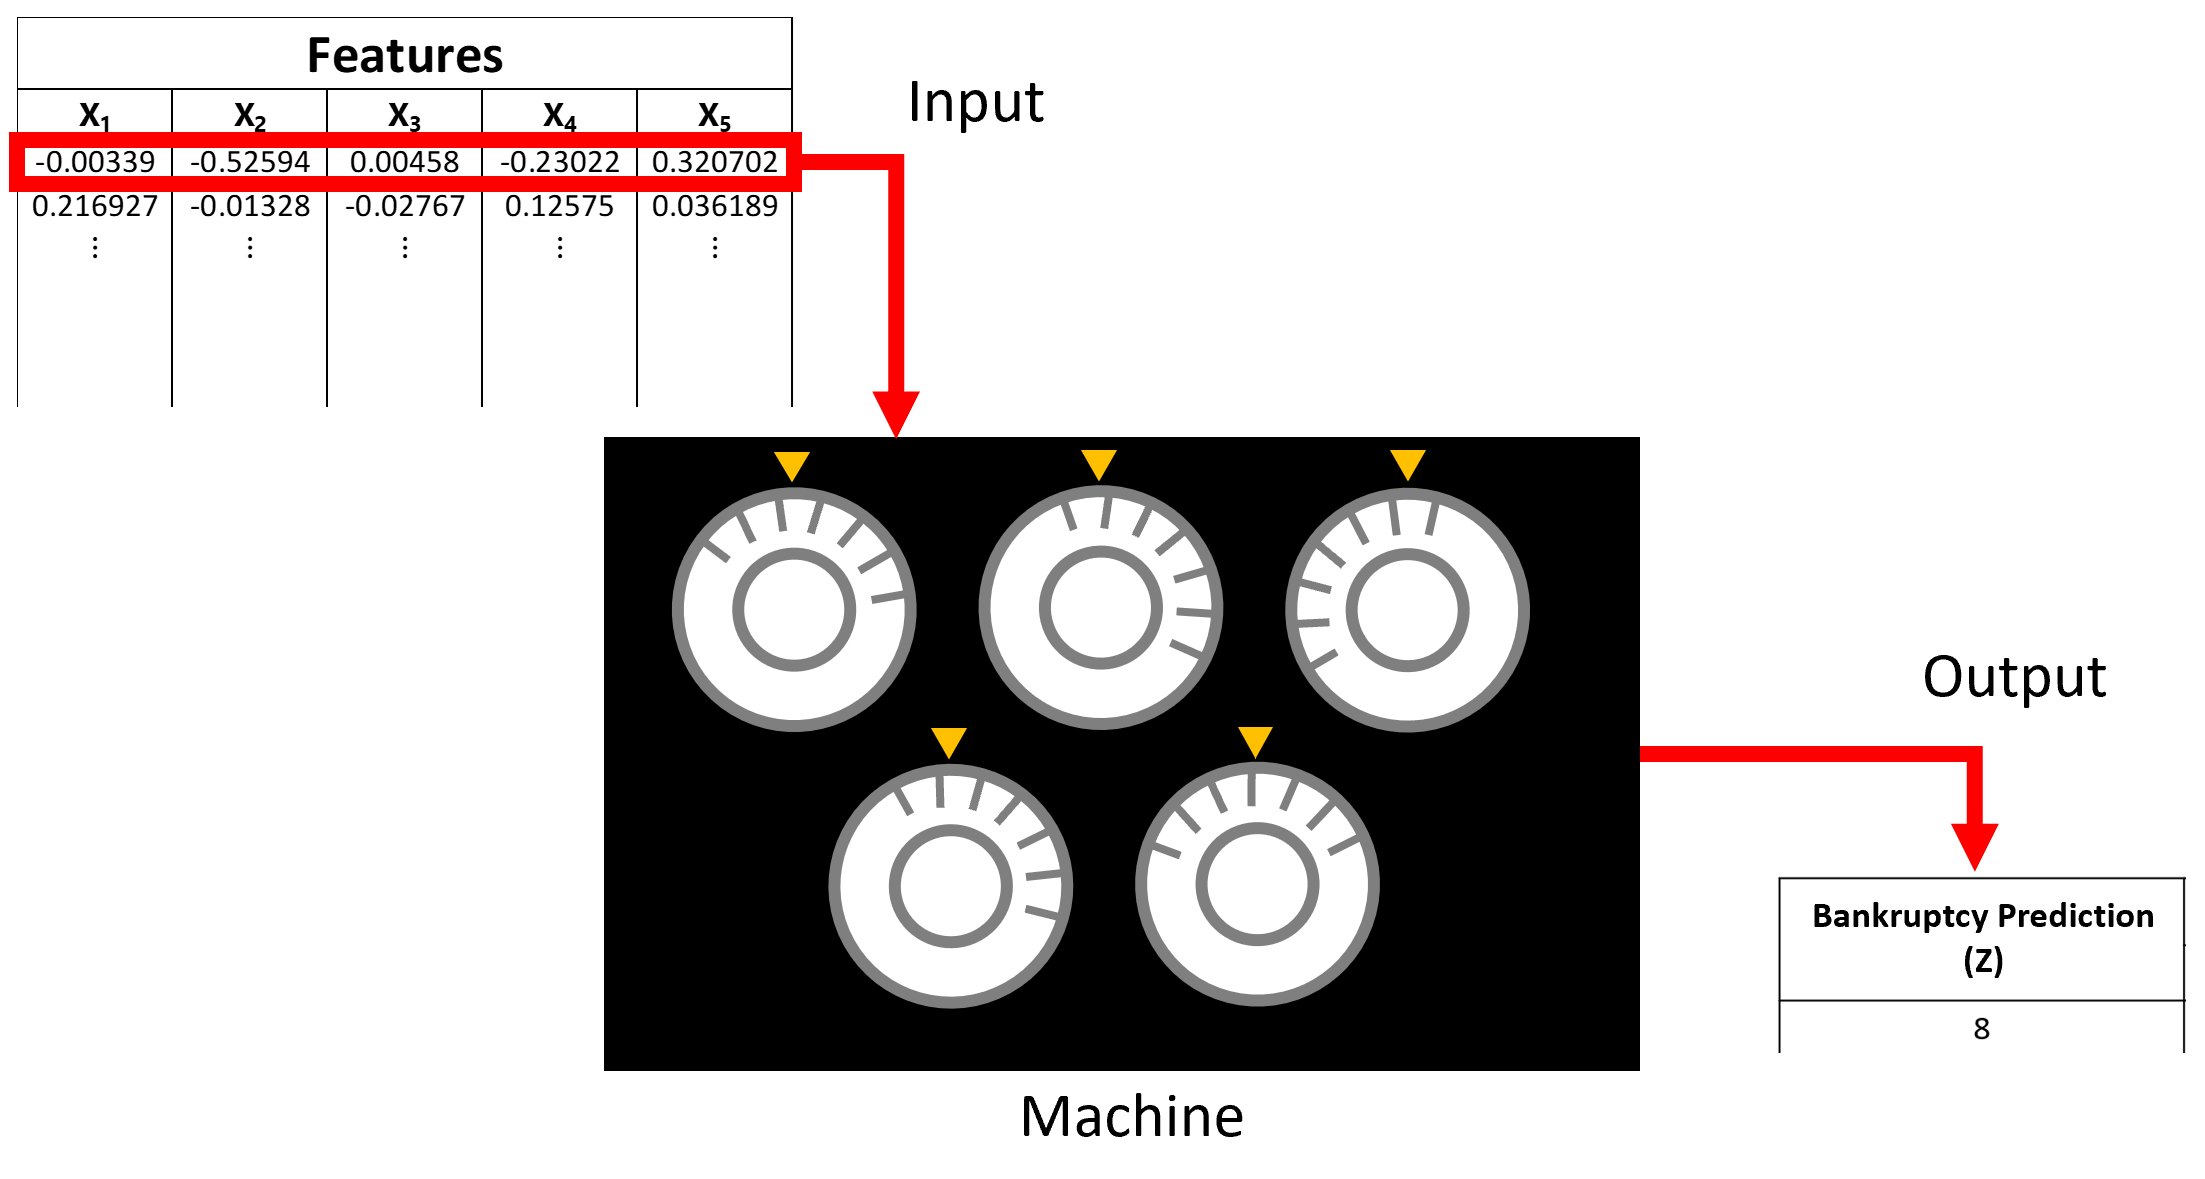

## Get The Data

In [68]:
# Read in bad stocks and good stocks feature data
badStocks = pd.read_csv('badStocks.csv', index_col=0)
goodStocks = pd.read_csv('goodStocks.csv', index_col=0)

badStocks.head()

,Ticker,Name,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,date,YearBankrupt
0,HTZ,The Hertz Corporation,-0.341199,0.000000,-0.045955,-0.005947,31/12/2020,2020
1,JCP,JCPenney,0.099387,-0.459006,-0.070597,0.115782,29/02/2020,2020
2,TLRD,Tailored Brands,0.085321,-0.235100,-0.064157,-0.039053,29/02/2020,2020
3,VALP,Valaris plc,0.013803,0.039672,-0.035438,1.221476,31/12/2019,2020
4,CHK,Chesapeake Energy Corporation,-0.070463,-0.878157,-0.038844,0.370081,31/12/2019,2020


In [69]:
goodStocks.head()

,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,Ticker,date
0,-0.003389,-0.525936,0.004580,-0.230224,PSTL,2017-12-31
1,0.216927,-0.013280,-0.027674,0.320702,QDEL,2017-12-31
2,0.127095,0.125750,0.036189,0.917661,TEAM,2015-06-30
3,0.679385,-1.369785,-0.223595,2.597259,ZGNX,2017-12-31
4,0.010277,-0.114241,-0.008875,0.252099,SKT,2018-12-31


In [70]:
# Isolate the specific features we want, and assign the outcomes
goodStocks['Bankrupt']=0
goodStocks = goodStocks[['Ticker',
                         'date',
                         '(CA-CL)/TA',
                         'RE/TA',
                         'EBIT/TA',
                         'BookEquity/TL', 
                         'Bankrupt']]

badStocks['Bankrupt']=1
badStocks = badStocks[['Ticker',
                       'date',
                       '(CA-CL)/TA',
                       'RE/TA',
                       'EBIT/TA',
                       'BookEquity/TL',
                       'Bankrupt']]
goodStocks.head()

,Ticker,date,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,Bankrupt
0,PSTL,2017-12-31,-0.003389,-0.525936,0.004580,-0.230224,0
1,QDEL,2017-12-31,0.216927,-0.013280,-0.027674,0.320702,0
2,TEAM,2015-06-30,0.127095,0.125750,0.036189,0.917661,0
3,ZGNX,2017-12-31,0.679385,-1.369785,-0.223595,2.597259,0
4,SKT,2018-12-31,0.010277,-0.114241,-0.008875,0.252099,0


In [71]:
badStocks.head()

,Ticker,date,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL,Bankrupt
0,HTZ,31/12/2020,-0.341199,0.000000,-0.045955,-0.005947,1
1,JCP,29/02/2020,0.099387,-0.459006,-0.070597,0.115782,1
2,TLRD,29/02/2020,0.085321,-0.235100,-0.064157,-0.039053,1
3,VALP,31/12/2019,0.013803,0.039672,-0.035438,1.221476,1
4,CHK,31/12/2019,-0.070463,-0.878157,-0.038844,0.370081,1


In [79]:
# Combine the two DataFrames
stocksList = pd.concat([goodStocks, badStocks], ignore_index=True)
stocksList.drop(columns=['Ticker', 'date'], inplace=True)

# Extract the bankruptcy outcome labels to create the "y" outcomes
bankruptList = stocksList['Bankrupt']

# Keep only the stock feature data for the "X" feature data
stocksList.drop(columns=['Bankrupt'], inplace=True)

stocksList # View X

,(CA-CL)/TA,RE/TA,EBIT/TA,BookEquity/TL
0,-0.003389,-0.525936,0.004580,-0.230224
1,0.216927,-0.013280,-0.027674,0.320702
2,0.127095,0.125750,0.036189,0.917661
3,0.679385,-1.369785,-0.223595,2.597259
4,0.010277,-0.114241,-0.008875,0.252099
5,0.000000,-0.000251,0.019922,0.853294
6,-0.483229,0.141865,0.017564,0.178250
7,0.809012,-1.066806,-0.148188,0.193045
8,-0.010640,-0.031013,0.030077,0.271809
9,0.874379,-3.807828,-0.639818,10.474194


In [83]:
bankruptList # view y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Bankrupt, dtype: int64

In [84]:
stocksList.to_csv('bankruptStocks.csv')
bankruptList.to_csv('bankruptStocksTarget.csv')

## Use Linear Discriminant Analysis - Like Altman 1968 Paper

In [85]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis() # Create the model
clf.fit(stocksList, bankruptList) # Train(fit) the model

# Quick view of the results
print('Bankruptcy Prediction')
print(clf.predict(stocksList))
print('\n')
print('Actual Bankruptcy')
print(np.array(bankruptList))

Bankruptcy Prediction
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 1 1]


Actual Bankruptcy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


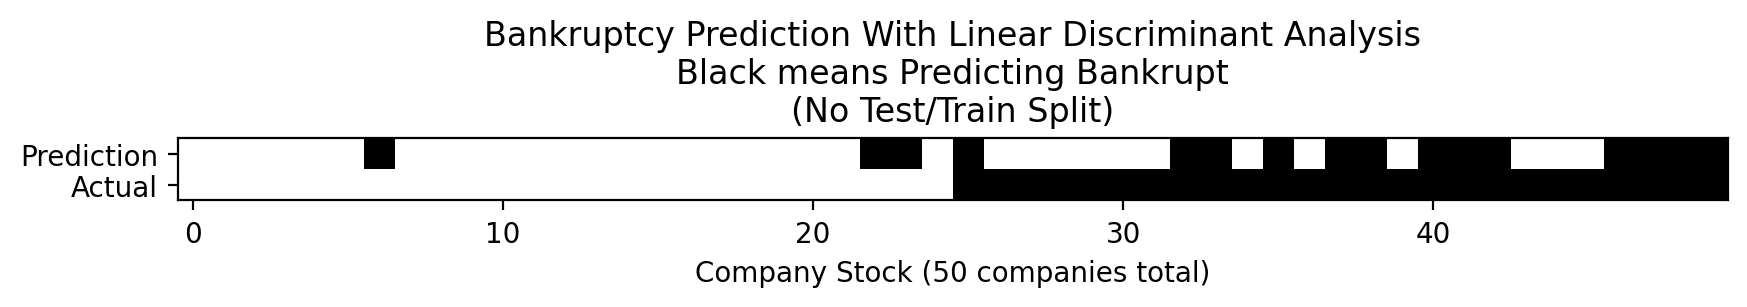

In [89]:
from matplotlib import pyplot as plt

# Visualising the bankruptcy prediction
plt.figure(figsize=(10,10), dpi=200)
plt.imshow([1-clf.predict(stocksList), 
            1-np.array(bankruptList)], cmap='gnuplot2')
plt.title('Bankruptcy Prediction With Linear Discriminant Analysis\n'+
          'Black means Predicting Bankrupt\n'+
          '(No Test/Train Split)')
plt.yticks(ticks=[0, 1], labels=['Prediction',
                                 'Actual'])
plt.xlabel('Company Stock (50 companies total)');

In [59]:
print(clf.intercept_)
print(clf.coef_)

[0.05797746]
[[ 2.19376985 -0.3672349   3.1718622   0.25244928]]


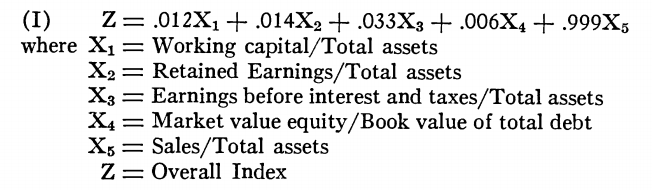

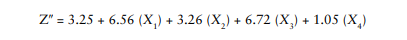

In [106]:
badStocks.mean() # See the mean of the features 

(CA-CL)/TA      -0.144248
RE/TA           -0.500063
EBIT/TA         -0.171577
BookEquity/TL    0.057363
Bankrupt         0.000000
dtype: float64

In [107]:
goodStocks.mean() # See the mean of the features 

(CA-CL)/TA       0.219673
RE/TA           -0.503159
EBIT/TA         -0.124521
BookEquity/TL    1.088780
Bankrupt         1.000000
dtype: float64

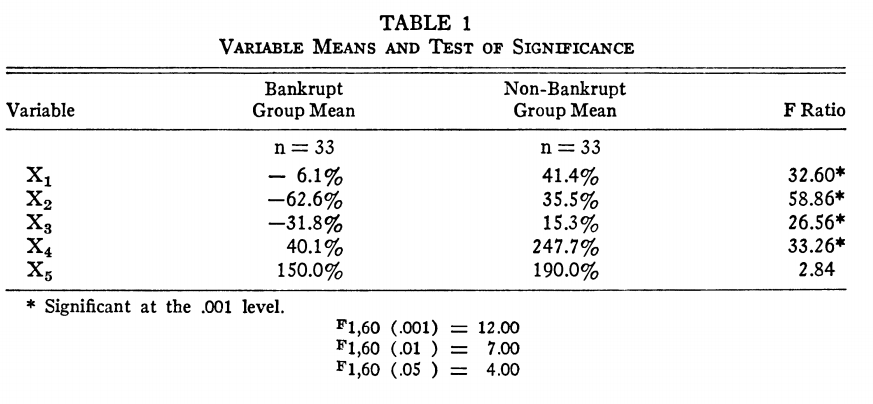

## Testing On A Stock I Like (COST)

In [60]:
# Taking SEC filings from http://investor.costco.com/
# Some rough figures from https://www.macrotrends.net/

# in $Millions
CA = 32565
CL = 31545
TA = 63078
RE = 5140 # Retained earnings
EBIT = 7438
TL = 43102
BookEquity = 19976

X1 = (CA-CL)/TA
X2 = RE/TA
X3 = EBIT/TA
X4 = BookEquity/TL

In [94]:
# If predict bankrupt, returns 1, which is "True" in Python.
if clf.predict(np.array([X1,X2,X3,X4]).reshape(1,-1)):
    print('Going to go bust')
else:
    print('Not going bankrupt')

Not going bankrupt


## End

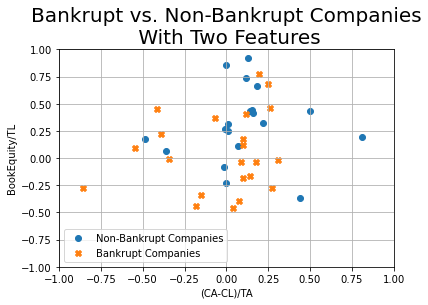

In [12]:
# Not a useful plot, as we have 4 feature dimensions to consider, not 2. 
# Just looking at the data in a plot.

from matplotlib import pyplot as plt
plt.scatter(goodStocks['(CA-CL)/TA'], goodStocks['BookEquity/TL'])
plt.scatter(badStocks['(CA-CL)/TA'], badStocks['BookEquity/TL'], marker='X')
plt.xlabel('(CA-CL)/TA')
plt.ylabel('BookEquity/TL')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()
plt.legend(['Non-Bankrupt Companies','Bankrupt Companies']);
plt.title('Bankrupt vs. Non-Bankrupt Companies\n With Two Features', fontsize=20);